## Goal 
Filter non-continuous stocks after merging with the news data.

In [20]:
import sys
sys.path.append(r'../models/')

import pandas as pd
import matplotlib.pyplot as plt
from data_cleaning import MARKET_DATA_PATH, NEWS_DATA_PATH, clean_market_data, clean_news_data, clean_data

%matplotlib inline

In [4]:
market_train_df = pd.read_csv(MARKET_DATA_PATH)

In [5]:
clean_market_df = clean_market_data(market_train_df)
del market_train_df

In [6]:
news_train_df = pd.read_csv(NEWS_DATA_PATH)

In [8]:
clean_news_df = clean_news_data(news_train_df)
del news_train_df

In [9]:
clean_news_df.head()

,time,assetCode,sentimentNegative,sentimentNeutral,sentimentPositive,urgency,bodySize,relevance,ACN,ACT,...,ONE,PNW,PRN,RNS,ROM,RTRS,SEHK,SET,SSN,TEN
0,2007-01-01,0857.DE,0.500739,0.419327,0.079934,3.0,1438.0,0.235702,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2007-01-01,0857.F,0.500739,0.419327,0.079934,3.0,1438.0,0.235702,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2007-01-01,0857.HK,0.500739,0.419327,0.079934,3.0,1438.0,0.235702,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2007-01-01,6758.T,0.146765,0.392352,0.460883,3.0,2742.0,0.204124,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2007-01-01,BHP.AX,0.130677,0.465433,0.403891,3.0,9674.0,0.178174,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
clean_news_df.time.nunique()

3652

This number is larger than for the market data (2488). Probably because the weekends are included?

In [11]:
sizes = clean_news_df.groupby('assetCode').size()
sel = sizes == clean_news_df.time.nunique()
sum(sel)

0

This is what I expected: it is very unlikely that news are published for a company every single day for 10+ years. Will probably have to engineer a feature taking the average of the different metrics over some period and add a feature of the number of articles included in the average (or the sum of their importance/urgency).

But first, let's look at the distributions to have a better idea of the extend of the problem.

(array([1.044e+03, 6.610e+02, 5.780e+02, 5.620e+02, 5.430e+02, 5.500e+02,
        5.750e+02, 5.160e+02, 4.690e+02, 4.340e+02, 4.340e+02, 3.920e+02,
        3.480e+02, 3.280e+02, 3.570e+02, 3.240e+02, 2.740e+02, 2.490e+02,
        2.840e+02, 2.730e+02, 2.130e+02, 2.260e+02, 1.940e+02, 1.850e+02,
        1.640e+02, 1.810e+02, 1.770e+02, 1.410e+02, 1.290e+02, 1.250e+02,
        1.210e+02, 1.190e+02, 9.400e+01, 1.310e+02, 1.250e+02, 7.400e+01,
        7.500e+01, 9.300e+01, 7.400e+01, 6.900e+01, 9.400e+01, 6.000e+01,
        6.000e+01, 5.700e+01, 6.200e+01, 5.700e+01, 4.400e+01, 4.000e+01,
        3.200e+01, 4.200e+01, 4.500e+01, 4.800e+01, 5.500e+01, 2.900e+01,
        4.700e+01, 3.000e+01, 3.300e+01, 2.800e+01, 4.400e+01, 2.700e+01,
        2.300e+01, 3.500e+01, 3.000e+01, 3.700e+01, 3.200e+01, 2.100e+01,
        1.300e+01, 8.000e+00, 3.200e+01, 1.500e+01, 1.600e+01, 1.500e+01,
        1.500e+01, 1.500e+01, 1.600e+01, 2.300e+01, 2.100e+01, 1.700e+01,
        1.400e+01, 1.700e+01, 1.900e+0

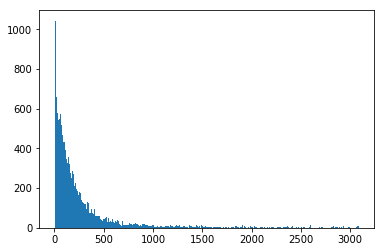

In [21]:
plt.hist(sizes, bins=int((sizes.max() - sizes.min())/10))

We see thatmost stocks have very little news coverage. 
One possible solution would be to bin on a 10 day basis.
Another possible solution would be to simply fill the blanks with 0s. This solution feels like the easiest.